In [46]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd
import os


In [68]:
frames = []
for dirname, _, filenames in os.walk(r'C:\Users\muham\vs_code\Chiara'):
    for filename in filenames:
        file = open(os.path.join(dirname, filename))
        data = []

        for line in file:
            adj =[]
            adj = [float(i) for i in line.split()]
            data.append(adj)

        data = pd.DataFrame(data)
        frames.append(data)


In [86]:
max = frames[0][0].max()
min = frames[0][0].min()
for frame in frames:
    if frame[0].min() > min:
        min = frame[0].min()
    if frame[0].max() < max:
        max = frame[0].max()
div = int((max- min)//2.01)

In [143]:
result = []

In [144]:
xi_ = np.linspace(max, min, div)
for frame in frames:
    temp = pd.DataFrame()
    temp[0] = xi_[::-1]
    x = frame[0]
    for i in range(1,frame.shape[1]):
        y = frame[i]
        f = interp1d(x,y, kind="cubic")
        yi = f(xi_)
        temp[i] = yi[::-1]
    result.append(temp)

In [154]:
# file = open(r"C:\Users\muham\vs_code\Chiara\results\GO_June20th.txt", 'w')
result[4].to_csv(r"C:\Users\muham\vs_code\Chiara\results\N-rGO_June19th.csv", index = False)

5


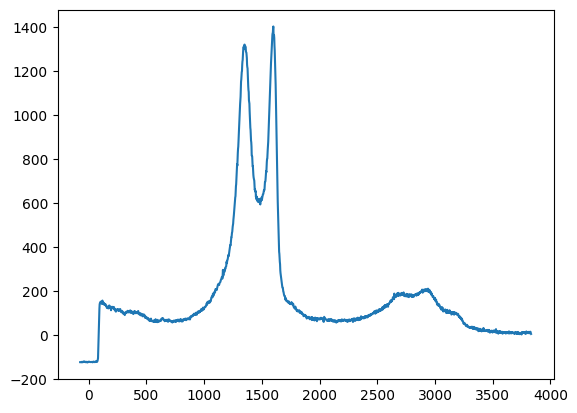

In [140]:
xi_ = np.linspace(max, min, div)
plt.plot(xi_,first[2], label="cubic spline")

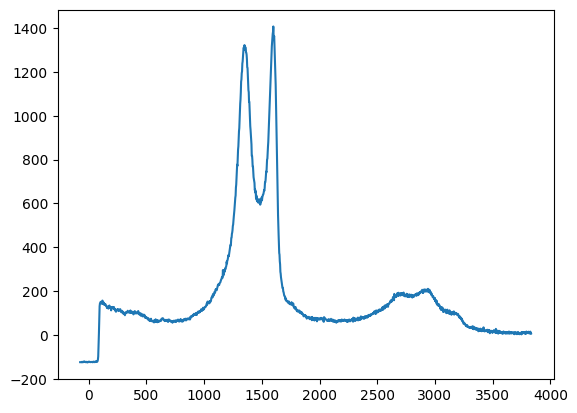

In [141]:
plt.plot(frames[0][0], frames[0][2])